In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

from semi_supervised_manifold_learning import *
from submodular_cut_fns import *
from debugging_animation import animate_hgraph_diffusion, animate_graph_diffusion


# plt.rcParams["animation.html"] = "jshtml"
# plt.ioff()
from IPython.display import HTML
from IPython.display import Audio


%load_ext autoreload
%autoreload 2

# Simple (hyper)graphs for checking diffusion correctness

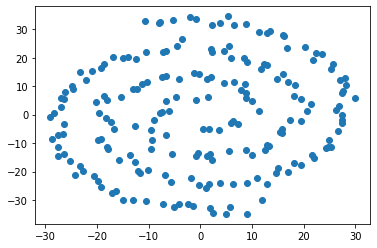

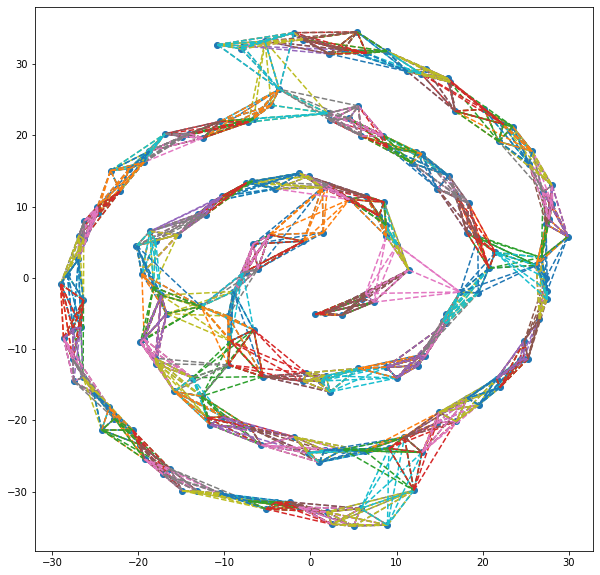

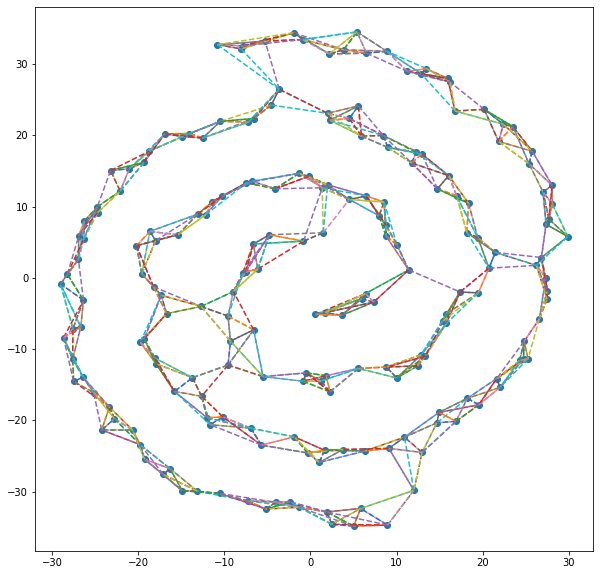

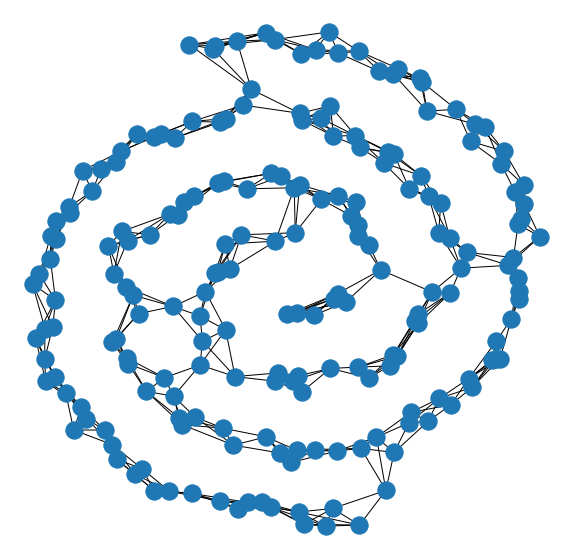

In [5]:
# generate new data
_, data_matrix = generate_spirals(n_pts=100, verbose = False) #start_theta=np.pi / 5, num_rotations=0.9, verbose=False)

# build a hypergraph from k-nearest-nbs of each point
k = 5
knn_hgraph_dict = build_knn_hypergraph(data_matrix, k)
n = knn_hgraph_dict['n']

star_hgraph_dict = build_knn_hypergraph_star_expansion(data_matrix, k)

knn_adj_matrix = build_knn_graph(data_matrix, k)
D = np.squeeze(np.asarray(np.sum(knn_adj_matrix,axis=0)))
G = nx.from_scipy_sparse_matrix(knn_adj_matrix)
pos = dict([(v,data_matrix[v,:]) for v in G.nodes()])

plt.scatter(data_matrix[:, 0], data_matrix[:, 1])
plt.show()

visualize_hyperedges(data_matrix, knn_hgraph_dict['hypergraph'])
visualize_hyperedges(data_matrix, star_hgraph_dict['hypergraph'])

fig, ax = plt.subplots(figsize = (10,10))
nx.draw(G, pos = pos, ax = ax)

# sample a random initial seed node
x0 = np.full(shape=(n, 1), fill_value=0)
x0[np.random.choice(n, size = 1)] = 1

In [12]:
ani = animate_hgraph_diffusion(data_matrix, knn_hgraph_dict, x0)

HTML(ani.to_html5_video())

In [3]:
ani = animate_hgraph_diffusion(data_matrix, star_hgraph_dict, x0)

HTML(ani.to_html5_video())

In [4]:
ani = animate_graph_diffusion(data_matrix, knn_adj_matrix, D, x0)

HTML(ani.to_html5_video())